<a href="https://colab.research.google.com/github/RAFS20/Ciencias-Sociales-Computacionales/blob/main/Rumores_en_Redes_Sociales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de rumores en redes sociales

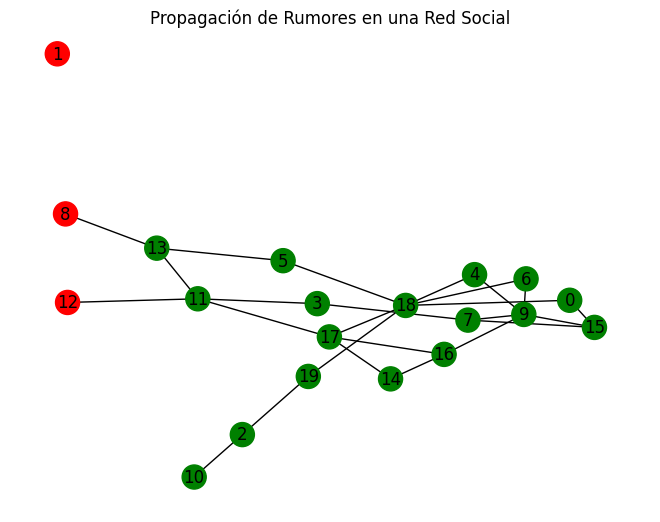

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Crear una red social simulada
G = nx.erdos_renyi_graph(n=20, p=0.1)

# Elegir un nodo de inicio para el rumor
inicio_rumor = random.choice(list(G.nodes()))

# Almacenar el estado de cada nodo (0 = no ha escuchado el rumor, 1 = ha escuchado el rumor)
estado = {nodo: 0 for nodo in G.nodes()}
estado[inicio_rumor] = 1

# Propagar el rumor en la red social
def propagar_rumor(G, estado, probabilidad_propagacion):
    for nodo in G.nodes():
        if estado[nodo] == 1:
            vecinos = list(G.neighbors(nodo))
            for vecino in vecinos:
                if estado[vecino] == 0 and random.random() <= probabilidad_propagacion:
                    estado[vecino] = 1

# Realizar la propagación del rumor durante 10 iteraciones
for _ in range(10):
    propagar_rumor(G, estado, 0.3)

# Visualizar la red social con colores basados en el estado del rumor
colors = ['green' if estado[nodo] == 1 else 'red' for nodo in G.nodes()]
nx.draw(G, node_color=colors, with_labels=True)
plt.title("Propagación de Rumores en una Red Social")
plt.show()


In [8]:
!pip install networkx
!pip install matplotlib
!pip install ffmpeg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=cae042ac00158baeff57de0932f23af8b6ec95f23cab92dea88613322fdef50c
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [19]:
!pip install networkx matplotlib moviepy





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


t:  10%|█         | 1/10 [03:48<34:17, 228.61s/it, now=None]

Moviepy - Building video rumor_propagation.mp4.
Moviepy - Writing video rumor_propagation.mp4




t:  10%|█         | 1/10 [03:50<34:34, 230.46s/it, now=None]

Moviepy - Done !
Moviepy - video ready rumor_propagation.mp4


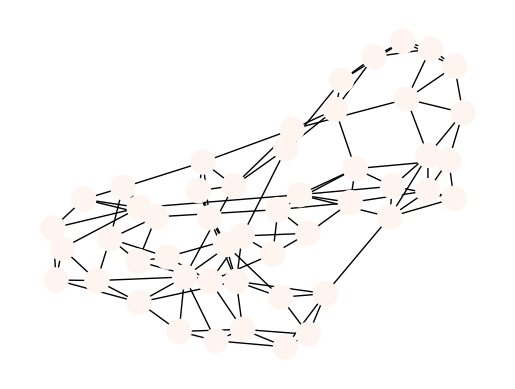

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# Generar una red social de 50 personas como un grafo
G = nx.newman_watts_strogatz_graph(50, 5, 0.2)

# Inicializar la matriz de propagación de rumores
rumors = np.zeros((10, 50))

# Seleccionar una persona al azar para iniciar el rumor
rumors[0, np.random.randint(50)] = 1

# Simular la propagación de los rumores durante 10 etapas
for t in range(1, 10):
    for i, neighbors in enumerate(G.adjacency()):
        if rumors[t-1, i] == 1:
            rumors[t, i] = 1
            for neighbor in neighbors[1]:
                if np.random.rand() < 0.5:  # 50% de posibilidad de propagar el rumor
                    rumors[t, neighbor] = 1

# Generar animación
fig, ax = plt.subplots()

def make_frame(t):
    ax.clear()
    t_int = int(t)  # Redondear a la baja para obtener el índice de tiempo como un entero
    nx.draw(G, node_color=rumors[t_int], cmap=plt.cm.Reds, ax=ax)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=10)  # Ajustar el número total de frames aquí
animation.write_videofile("rumor_propagation.mp4", fps=1)

from IPython.display import HTML
from base64 import b64encode

mp4 = open('rumor_propagation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


